<a href="https://colab.research.google.com/github/dany4142/Data-Visualization/blob/master/deep_learning_in_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq kaggle
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 113.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/dl')

Mounted at /content/drive/


In [ ]:
# from google.colab import files
# files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [ ]:
# !kaggle datasets download gpiosenka/100-bird-species

100% 1.95G/1.96G [00:42<00:00, 43.7MB/s]
100% 1.96G/1.96G [00:42<00:00, 49.7MB/s]


In [ ]:
# !unzip '/content/drive/MyDrive/dl/100-bird-species.zip' -d "/content/drive/MyDrive/dl/bird_data"

In [ ]:
from fastbook import *
import fastai.vision.all as fstvision

In [ ]:
path = fstvision.Path('bird_data')

In [ ]:
birds = fstvision.DataBlock(blocks = (fstvision.ImageBlock, fstvision.CategoryBlock),
                            get_items = fstvision.partial(get_image_files,'./bird_data', folders = ['train', 'valid']),
                                                          get_y = fstvision.parent_label,
                            splitter = fstvision.GrandparentSplitter('train','valid'),
                            item_tfms = fstvision.RandomResizedCrop(224, min_scale = 0.3),
                            batch_tfms = fstvision.aug_transforms()
                            )

In [ ]:
dls = birds.dataloaders(path)

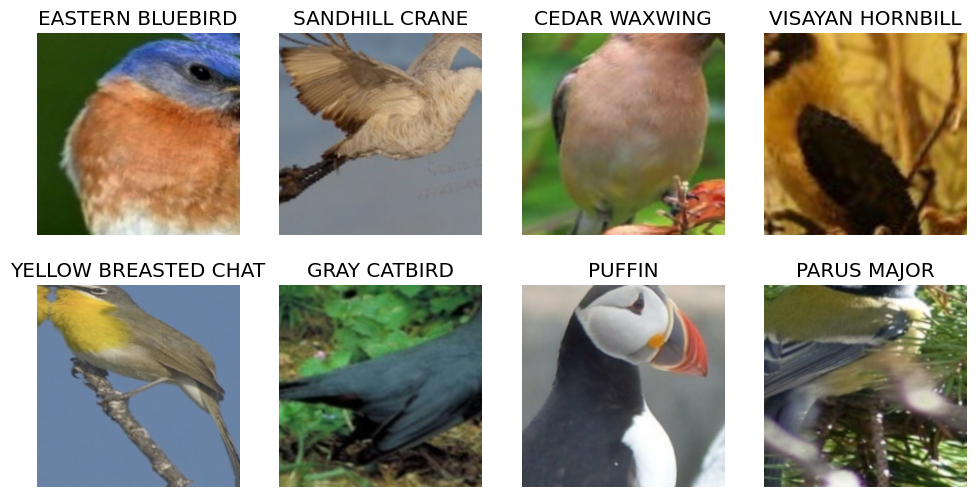

In [ ]:
dls.train.show_batch(max_n = 8, nrows = 2)

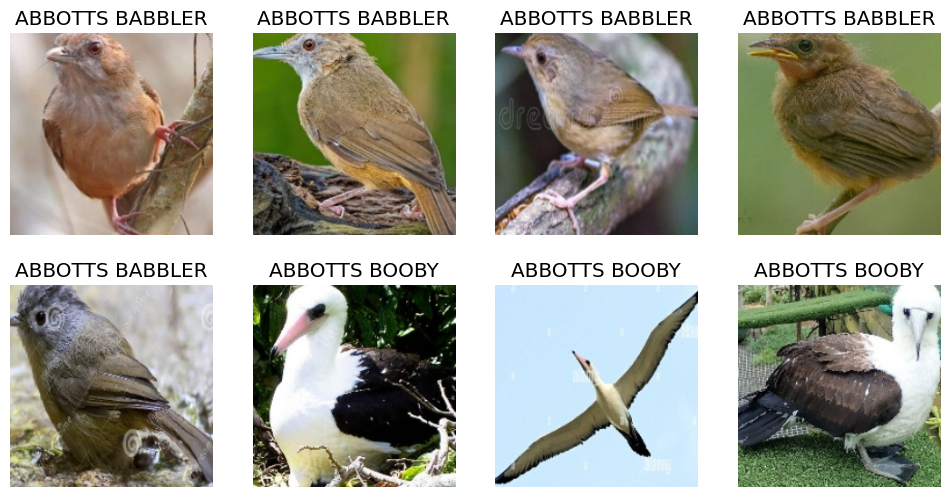

In [ ]:
dls.valid.show_batch(max_n = 8, nrows = 2)

In [ ]:
# birds = birds.new(item_tfms = fstvision.RandomResizedCrop(224, min_scale = 0.3),
#                   batch_tfms = fstvision.aug_transforms())
# dls = birds.dataloaders(path)

In [ ]:
# dls.train.show_batch(max_n = 8, nrows = 2)

In [ ]:
# dls.valid.show_batch(max_n = 8, nrows = 2)

In [ ]:
learn = fstvision.vision_learner(dls, fstvision.resnet18, metrics = fstvision.error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 96.1MB/s]


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = fstvision.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows = 1)

In [ ]:
learn.export(fname = 'bird_classification.pkl')
path = Path()
